In [71]:
from statsfun import pascal
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore
import seaborn as sns

In [4]:
row  = 15
data = pascal(row)
data

[1,
 15,
 105,
 455,
 1365,
 3003,
 5005,
 6435,
 6435,
 5005,
 3003,
 1365,
 455,
 105,
 15,
 1]

In [90]:
%matplotlib inline

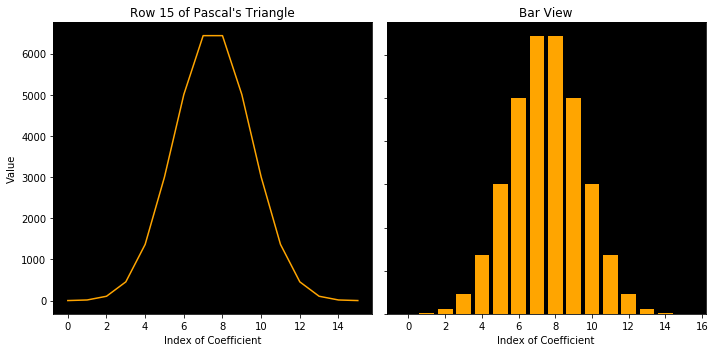

In [148]:
fig  = plt.figure(figsize=(10,5))
ax1   = plt.subplot('121')  # I will explain
rect = ax1.patch  # a Rectangle instance
rect.set_facecolor('black')

plt.title("Row {} of Pascal's Triangle".format(row))
ax1.set_xlabel('Index of Coefficient')
ax1.set_ylabel('Value')
plt.plot(data, color="orange")

ax2   = plt.subplot('122', sharey=ax)  # I will explain
rect = ax2.patch  # a Rectangle instance
rect.set_facecolor('black')
plt.setp(ax2.get_yticklabels(), visible=False)

plt.title("Bar View".format(row))
ax2.set_xlabel('Index of Coefficient')
plt.bar(range(len(data)), data, color="orange");

fig.tight_layout()
plt.show();

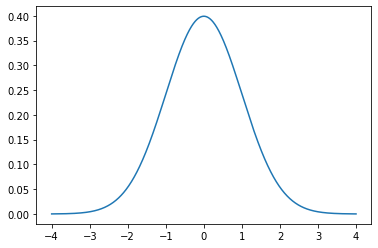

In [16]:
domain = np.linspace(-4,4,1000)
y = norm.pdf(domain, 0, 1)
plt.plot(domain,y);

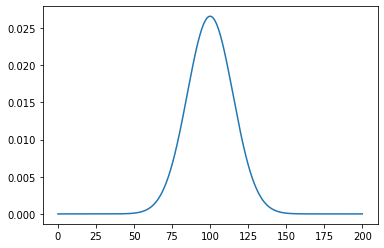

In [21]:
domain = np.linspace(0,200,1000)
y = norm.pdf(domain, 100, 15)
plt.plot(domain,y);

In [95]:
def z_score(x, mu, sigma, n=1):
    return (x - mu)/(sigma/math.sqrt(n))

z = z_score(145, 100, 15)
z

3.0

In [96]:
d = norm(0, 1)
1-d.cdf(z)

0.0013498980316301035

In [84]:
d = norm(loc=100.0, scale=15.0)
1 - d.cdf(110)

0.2524925375469229

In [74]:
z_score(93, 100, 15, n=9)

-1.4

In [76]:
1-d.cdf(-1.4)

0.9192433407662289

In [112]:
z = z_score(115, 100, 15)
d = norm(0, 1)
d.cdf(z)

0.8413447460685429

In [113]:
z

1.0

In [114]:
d.ppf(0.8413447460685429)

1.0

In [92]:
d = norm(100, 15)
d.cdf(100+15) - d.cdf(100-15)

0.6826894921370859

In [77]:
def draw_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

In [39]:
d.cdf(110)-d.cdf(90)

0.4950149249061542

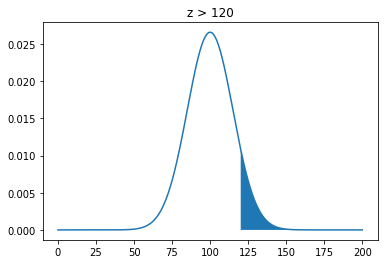

In [27]:
draw_z_score(domain, domain>120, 100, 15, 'z > 120')

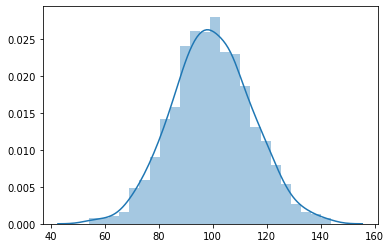

In [30]:
from numpy import random
sns.distplot(random.normal(loc=100, scale=15, size=1000), hist=True)
plt.show() 

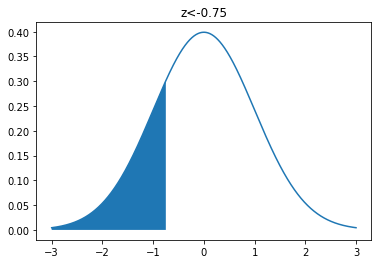

In [64]:
x = np.arange(-3,3,0.001)
z0 = -0.75
draw_z_score(x, x<z0, 0, 1, 'z<-0.75')

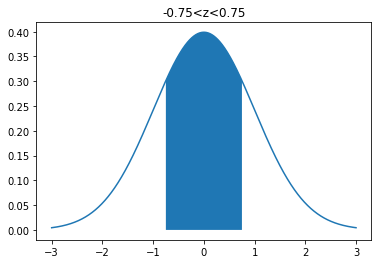

In [65]:
x = np.arange(-3,3,0.001)
z0 = 0.75
draw_z_score(x, (-z0 < x) & (x < z0), 0, 1, '-0.75<z<0.75')

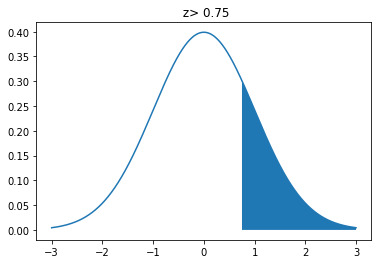

In [66]:
x = np.arange(-3,3,0.001)
z0 = 0.75
draw_z_score(x, x > z0, 0, 1, ' z> 0.75')